In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.shape

(600, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
#defining a feature and target
x=data.drop(["Taxable.Income"], axis=1)
x.shape

(600, 5)

In [8]:
y=pd.DataFrame(data["Taxable.Income"])
y.shape

(600, 1)

In [9]:
# As per question taxable_income <= 30000 as "Risky" and others are "Good"
Y_ = y<=30000
Y_new=pd.DataFrame(Y_.replace([False,True],['Good','Risky']))
print(Y_new)

    Taxable.Income
0             Good
1             Good
2             Good
3             Good
4             Good
..             ...
595           Good
596           Good
597           Good
598           Good
599           Good

[600 rows x 1 columns]


In [10]:
Y_new.value_counts()

Taxable.Income
Good              476
Risky             124
dtype: int64

In [11]:
x.dtypes

Undergrad          object
Marital.Status     object
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [12]:
Y_new.dtypes

Taxable.Income    object
dtype: object

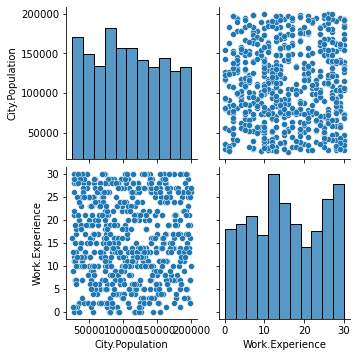

In [13]:
sns.pairplot(x)

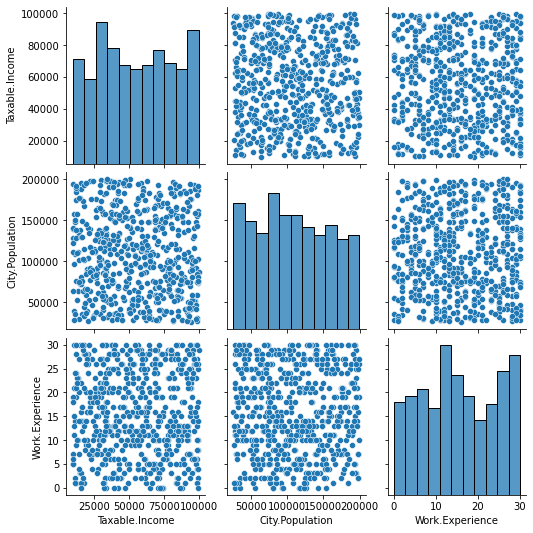

In [14]:
sns.pairplot(data)

In [15]:
x_enc=pd.get_dummies(x)
x_enc.shape

(600, 9)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_enc=le.fit_transform(Y_new)
pd.DataFrame(y_enc).head()

F:\Users\Om\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,0
1,0
2,0
3,0
4,0


In [19]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_scale=ss.fit_transform(x_enc)

In [20]:
#splitting data into tain and test
x_train,x_test,y_train,y_test=train_test_split(x_scale,y_enc,test_size=0.2,random_state=42)

# <h2>model building</h2>
<h3>Building Decision Tree Classifier (C5.0) using entropy Criteria</h3>

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

print(model.tree_.max_depth)
model.score(x_test,y_test) # model  score on traing data.

3


0.775

[Text(0.5, 0.875, 'X[5] <= 0.378\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]'),
 Text(0.25, 0.625, 'X[1] <= 1.578\nentropy = 0.685\nsamples = 324\nvalue = [265, 59]'),
 Text(0.125, 0.375, 'X[1] <= 0.899\nentropy = 0.666\nsamples = 311\nvalue = [257, 54]'),
 Text(0.0625, 0.125, 'entropy = 0.715\nsamples = 244\nvalue = [196, 48]'),
 Text(0.1875, 0.125, 'entropy = 0.435\nsamples = 67\nvalue = [61, 6]'),
 Text(0.375, 0.375, 'X[0] <= 0.247\nentropy = 0.961\nsamples = 13\nvalue = [8, 5]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(0.75, 0.625, 'X[0] <= 1.374\nentropy = 0.811\nsamples = 156\nvalue = [117, 39]'),
 Text(0.625, 0.375, 'X[0] <= 1.348\nentropy = 0.847\nsamples = 135\nvalue = [98, 37]'),
 Text(0.5625, 0.125, 'entropy = 0.831\nsamples = 133\nvalue = [98, 35]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'X[0] <= 1.679\nentropy = 0.4

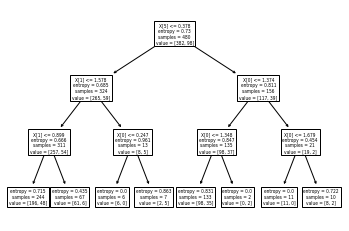

In [22]:
tree.plot_tree(model)

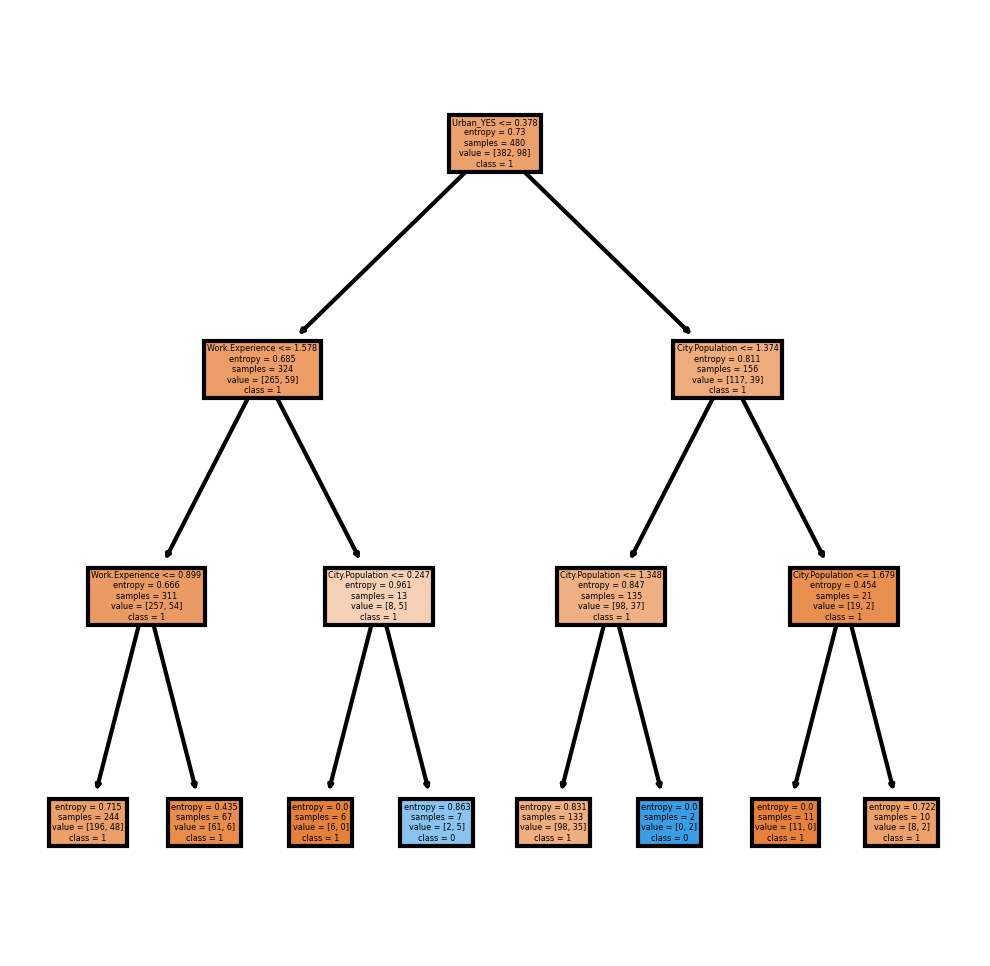

In [23]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);